In [ ]:
# Instalar bibliotecas necesarias
!pip install pandas matplotlib scikit-learn

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
# Subir el archivo .csv desde tu ordenador
uploaded = files.upload()

Saving Metallodrugs_PubChem_MetalFP_ECFP4.csv to Metallodrugs_PubChem_MetalFP_ECFP4.csv


In [ ]:
# Cargar el archivo .csv en un DataFrame
filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo cargado
df = pd.read_csv(filename)

In [ ]:
# Revisar las primeras filas del DataFrame (opcional)
df.head()

,Name,Type,PubChem_ID,Metal_Or_Radioisotope,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,...,bitvector_ECFP41015,bitvector_ECFP41016,bitvector_ECFP41017,bitvector_ECFP41018,bitvector_ECFP41019,bitvector_ECFP41020,bitvector_ECFP41021,bitvector_ECFP41022,bitvector_ECFP41023,Met_Charg_EState_ECFP4
0,Oxaliplatin,Metallodrug,9887053,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
1,Carboplatin,Metallodrug,426756,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
2,Lobaplatin,Metallodrug,24202037,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
3,Nedaplatin,Metallodrug,6917890,Pt,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
4,Picoplatin,Metallodrug,177358,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...


In [ ]:
# Verificar si las columnas requeridas existen
required_columns = ["Name", "Type", "PubChem_ID", "Metal_Or_Radioisotope", "Met_Charg_EState_ECFP4"]
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"El archivo debe contener las columnas: {required_columns}")

In [ ]:
# Extraer y procesar el fingerprint de la columna 'Met_Charg_EState_ECFP4'
fingerprints = df['Met_Charg_EState_ECFP4'].apply(lambda x: list(map(int, x)))

# Convertir a una matriz NumPy
fingerprint_data = np.array(fingerprints.tolist())

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fingerprint_data)

In [ ]:
# Crear el modelo t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# Ajustar y transformar los datos
tsne_results = tsne.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(tsne_results, columns=["t-SNE-1", "t-SNE-2"])

In [ ]:
# Unir el DataFrame original con las columnas requeridas y los resultados de t-SNE
merged_df = pd.concat([df[["Name", "Type", "PubChem_ID", "Metal_Or_Radioisotope"]], tsne_df], axis=1)

In [ ]:
# Guardar el DataFrame combinado en un archivo .csv (opcional)
output_filename = "tSNE_Metal_FP.csv"
merged_df.to_csv(output_filename, index=False)
print(f"El DataFrame combinado se guardó como '{output_filename}'.")

El DataFrame combinado se guardó como 'tSNE_Metal_FP.csv'.


In [ ]:
# Visualización del nuevo DataFrame
merged_df.head()

,Name,Type,PubChem_ID,Metal_Or_Radioisotope,t-SNE-1,t-SNE-2
0,Oxaliplatin,Metallodrug,9887053,Pt,5.785380,1.552172
1,Carboplatin,Metallodrug,426756,Pt,-4.532032,4.266332
2,Lobaplatin,Metallodrug,24202037,Pt,13.043980,4.491312
3,Nedaplatin,Metallodrug,6917890,Pt,6.346014,4.710679
4,Picoplatin,Metallodrug,177358,Pt,9.276613,2.371954


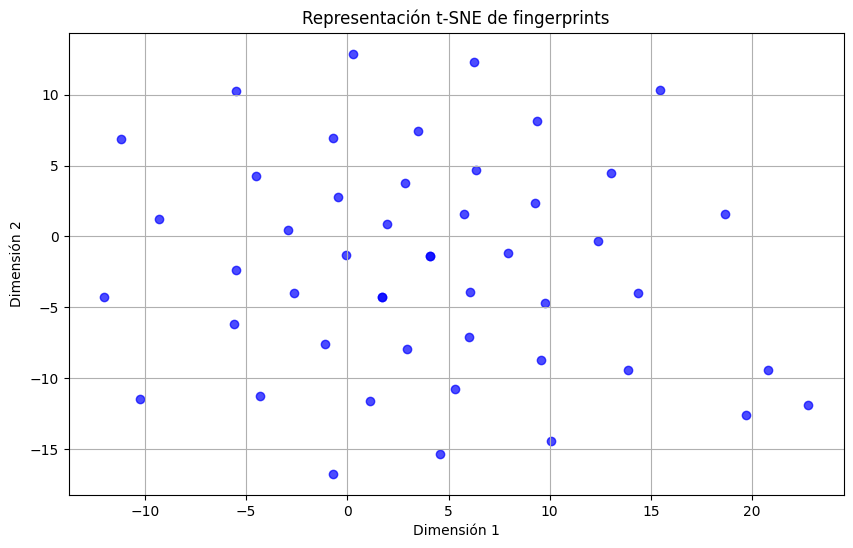

In [ ]:
# Graficar los resultados de t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["t-SNE-1"], tsne_df["t-SNE-2"], c='blue', alpha=0.7)
plt.title("Representación t-SNE de fingerprints")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.show()